1. взять любой набор данных для бинарной классификации (можно скачать один из модельных с https://archive.ics.uci.edu/ml/datasets.php)
- https://archive.ics.uci.edu/ml/machine-learning-databases/00222/

In [163]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [164]:
file = 'bank-marketing/bank.csv'
df = pd.read_csv(file, delimiter=';')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


## Dataset Description
### Input variables:
   #### bank client data:
   1 - age (numeric)
   <br>2 - job : type of job _(categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student",
                                       "blue-collar","self-employed","retired","technician","services")_ 
   <br>3 - marital : marital status _(categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)_
   <br>4 - education _(categorical: "unknown","secondary","primary","tertiary")_
   <br>5 - default: has credit in default? _(binary: "yes","no")_
   <br>6 - balance: average yearly balance, in euros _(numeric)_ 
   <br>7 - housing: has housing loan? _(binary: "yes","no")_
   <br>8 - loan: has personal loan? _(binary: "yes","no")_
   #### related with the last contact of the current campaign:
   9 - contact: contact communication type _(categorical: "unknown","telephone","cellular")_
  <br>10 - day: last contact day of the month _(numeric)_
  <br>11 - month: last contact month of year _(categorical: "jan", "feb", "mar", ..., "nov", "dec")_
  <br>12 - duration: last contact duration, in seconds _(numeric)_
   #### other attributes:
  13 - campaign: number of contacts performed during this campaign and for this client _(numeric, includes last contact)_
  <br>14 - pdays: number of days that passed by after the client was last contacted from a previous campaign _(numeric, -1 means client was not previously contacted)_
  <br>15 - previous: number of contacts performed before this campaign and for this client _(numeric)_
  <br>16 - poutcome: outcome of the previous marketing campaign _(categorical: "unknown","other","failure","success")_

  #### Output variable (desired target):
  17 - y - has the client subscribed a term deposit? _(binary: "yes","no")_

In [165]:
df.loc[df.campaign > df.campaign.quantile(.975)].y.value_counts()


no     103
yes      5
Name: y, dtype: int64

In [180]:
for col in binary_columns:
    df[col].replace({'yes': 1, 'no': 0}, inplace=True)

df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,0,1787,0,0,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,0,4789,1,1,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,0,1350,1,0,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,0,1476,1,1,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,0,0,1,0,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,0,-333,1,0,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,1,-3313,1,1,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,0,295,0,0,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,0,1137,0,0,cellular,6,feb,129,4,211,3,other,no


In [183]:
df.y.replace({'yes': 1, 'no': 0}, inplace=True)

## Exploratory Data Analysis

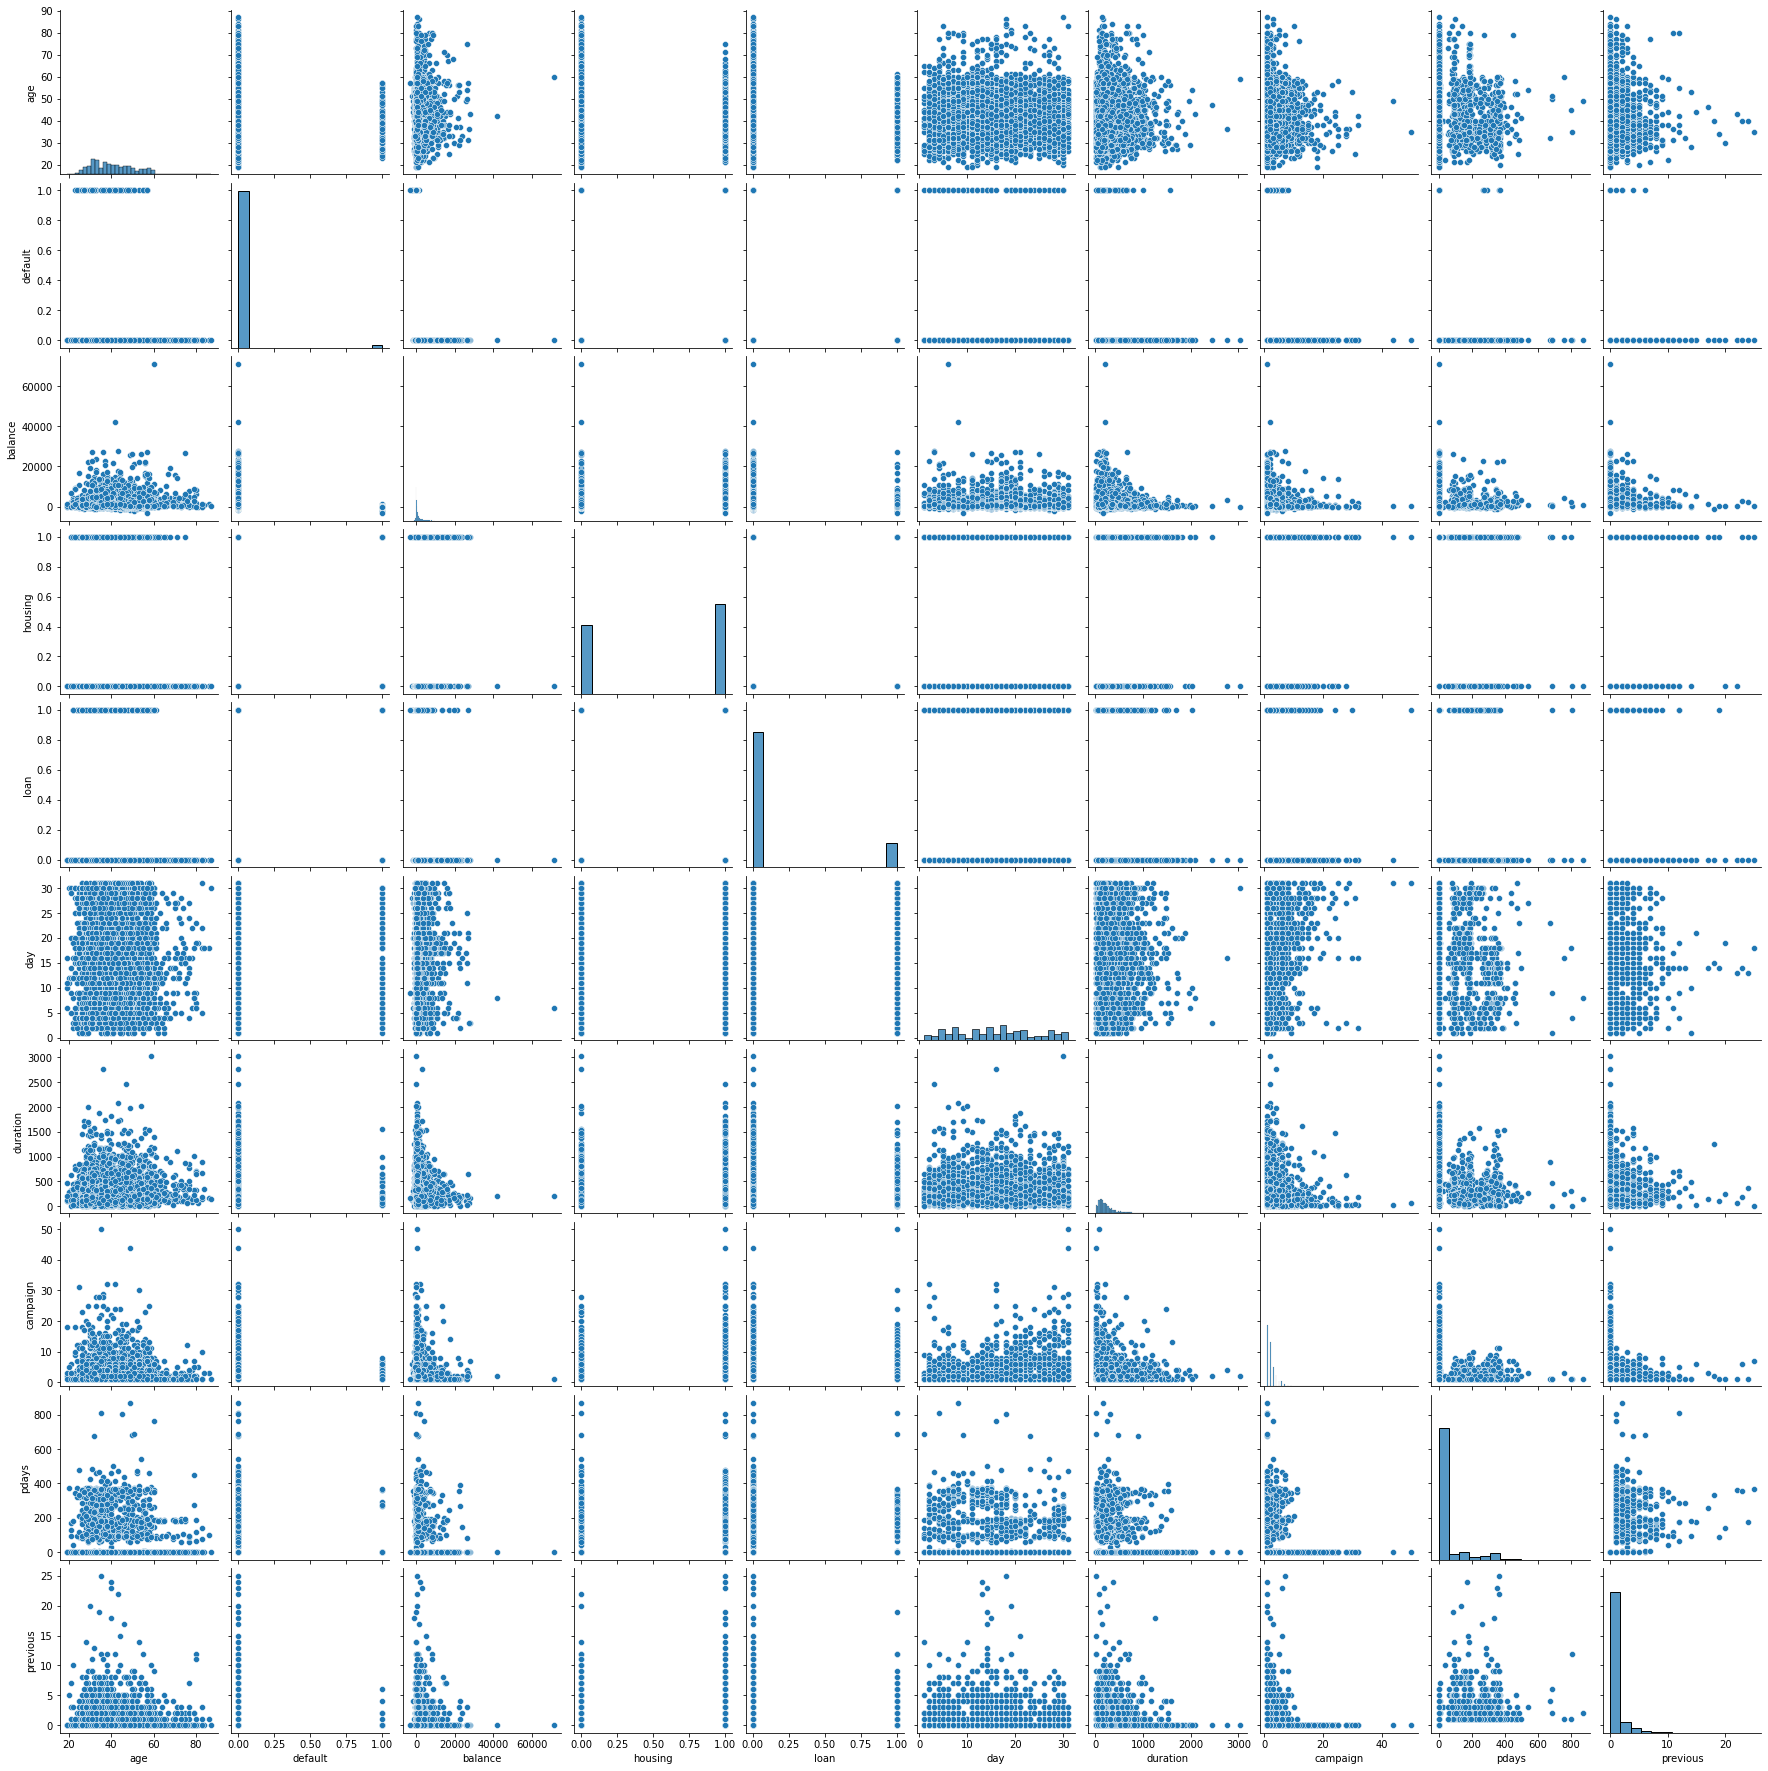

In [167]:
sns.pairplot(data=df);

In [168]:
df.balance.describe()

count     4521.000000
mean      1422.657819
std       3009.638142
min      -3313.000000
25%         69.000000
50%        444.000000
75%       1480.000000
max      71188.000000
Name: balance, dtype: float64

In [169]:
df.shape

(4521, 17)

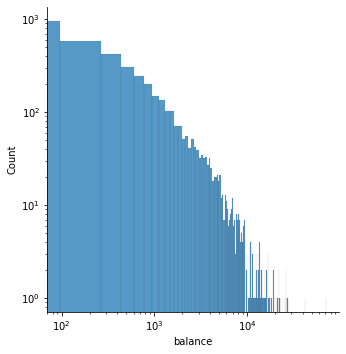

In [170]:
g = sns.displot(df.balance)
g.set(yscale='log');
g.set(xscale='log');

Most frequent value is: -1
Proportion of moda values: 0.82


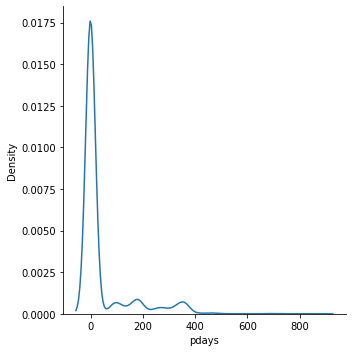

In [171]:
sns.displot(data=df.pdays, kind='kde');
print('Most frequent value is:', df.pdays.mode()[0])
tmp = df.loc[df.pdays == df.pdays.mode()[0]].shape[0]
print("Proportion of moda values: %.2f" % (tmp / df.shape[0]))

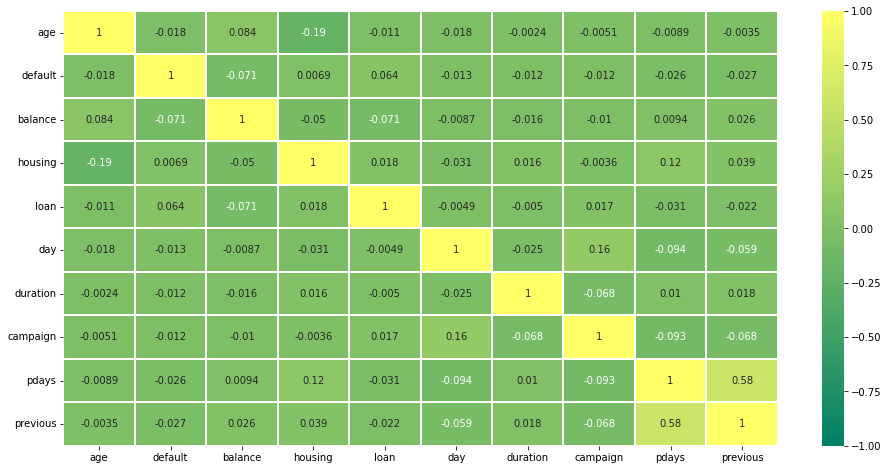

In [172]:
plt.figure(figsize=(16, 8))
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot = True, cmap ="summer", linewidths=.2);

In [173]:
df.describe()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,0.016810,1422.657819,0.566025,0.152842,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,0.128575,3009.638142,0.495676,0.359875,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,0.000000,-3313.000000,0.000000,0.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,0.000000,69.000000,0.000000,0.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,0.000000,444.000000,1.000000,0.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,0.000000,1480.000000,1.000000,0.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,1.000000,71188.000000,1.000000,1.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


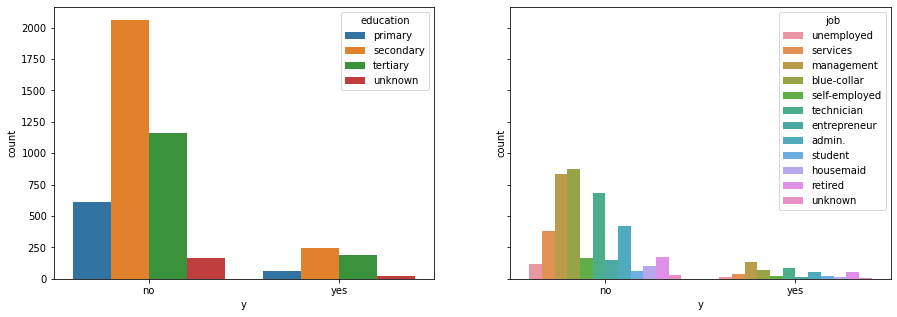

In [174]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)

sns.countplot(ax=axes[0], x=df.y, hue=df['education']);

sns.countplot(ax=axes[1], x=df.y, hue=df['job']);

2. сделать feature engineering

In [259]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.preprocessing import StandardScaler

class FeatureSelector(BaseEstimator, TransformerMixin):
    def __init__(self, column):
        self.column = column

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        return X[[self.column]]
    
class NumberSelector(BaseEstimator, TransformerMixin):
    """
    Transformer to select a single column from the data frame to perform additional transformations on
    Use on numeric columns in the data
    """
    def __init__(self, key):
        self.key = key

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X[[self.key]]
    
class OHEEncoder(BaseEstimator, TransformerMixin):
    def __init__(self, key):
        self.key = key
        self.columns = []

    def fit(self, X, y=None):
        self.columns = [col for col in pd.get_dummies(X, prefix=self.key).columns]
        return self

    def transform(self, X):
        X = pd.get_dummies(X, prefix=self.key)
        test_columns = [col for col in X.columns]
        for col_ in self.columns:
            if col_ not in test_columns:
                X[col_] = 0
        return X[self.columns]
    
class Binarizer(BaseEstimator, TransformerMixin):
    def __init__(self, key):
        self.key = key
        self.columns = []

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        X[self.key].replace({'yes': 1, 'no': 0}, inplace=True)
        return X[self.key]

In [260]:
binary_columns = ['default', 'housing', 'loan']
categorical_columns = ['job', 'marital', 'education', 'month', 'poutcome', 'contact']
real_columns = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

final_transformers = list()

for bin_col in binary_columns:
    bin_transformer = Pipeline([
        ('selector', FeatureSelector(column=bin_col)),
        ('binarizer', Binarizer(key=bin_col))
    ])
for cat_col in categorical_columns:
    cat_transformer = Pipeline([
                ('selector', FeatureSelector(column=cat_col)),
                ('ohe', OHEEncoder(key=cat_col))
            ])
    final_transformers.append((cat_col, cat_transformer))
    
for cont_col in real_columns:
    cont_transformer = Pipeline([
                ('selector', NumberSelector(key=cont_col)),
                ('scaler', StandardScaler())
            ])
    final_transformers.append((cont_col, cont_transformer))

    
feats = FeatureUnion(final_transformers)

feature_processing = Pipeline([('feats', feats)])

In [261]:
df_c = feature_processing.fit_transform(df)

In [262]:
data = pd.DataFrame(df_c)
df.y

0       0
1       0
2       0
3       0
4       0
       ..
4516    0
4517    0
4518    0
4519    0
4520    0
Name: y, Length: 4521, dtype: int64

3. обучить любой классификатор (какой вам нравится)

In [263]:
from sklearn.model_selection import train_test_split

x_data = df.iloc[:,:-1]
y_data = df.iloc[:,-1]

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=7)

In [264]:
x_test.shape

(905, 16)

In [274]:
import xgboost as xgb

model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='auc')

pipe = Pipeline([
    ('features', feats),
    ('classifier', model)
])

pipe.fit(x_train, y_train)

y_predict = pipe.predict(x_test)

In [275]:
from sklearn.metrics import recall_score, precision_score, roc_auc_score, accuracy_score, f1_score

def evaluate_results(y_test, y_predict):
    print('Classification results:')
    f1 = f1_score(y_test, y_predict)
    print("f1: %.2f%%" % (f1 * 100.0)) 
    roc = roc_auc_score(y_test, y_predict)
    print("roc: %.2f%%" % (roc * 100.0)) 
    rec = recall_score(y_test, y_predict, average='binary')
    print("recall: %.2f%%" % (rec * 100.0)) 
    prc = precision_score(y_test, y_predict, average='binary')
    print("precision: %.2f%%" % (prc * 100.0)) 

    
evaluate_results(y_test, y_predict)

Classification results:
f1: 43.79%
roc: 66.04%
recall: 35.58%
precision: 56.92%


4. далее разделить ваш набор данных на два множества: P (positives) и U (unlabeled). Причем брать нужно не все положительные (класс 1) примеры, а только лишь часть

In [276]:
mod_data = df.copy()
#get the indices of the positives samples
pos_ind = np.where(mod_data.iloc[:,-1].values == 1)[0]
#shuffle them
np.random.shuffle(pos_ind)
# leave just 25% of the positives marked
pos_sample_len = int(np.ceil(0.25 * len(pos_ind)))
print(f'Using {pos_sample_len}/{len(pos_ind)} as positives and unlabeling the rest')
pos_sample = pos_ind[:pos_sample_len]

Using 131/521 as positives and unlabeling the rest


In [277]:
mod_data['y'] = -1
mod_data.loc[pos_sample,'y'] = 1
print('target variable:\n', mod_data.iloc[:,-1].value_counts())

target variable:
 -1    4390
 1     131
Name: y, dtype: int64


In [278]:
x_data = mod_data.iloc[:,:-2].values # just the X 
y_labeled = mod_data.iloc[:,-1].values # new class (just the P & U)
y_positive = mod_data.iloc[:,-2].values # original class

5. применить random negative sampling для построения классификатора в новых условиях

In [279]:
mod_data = mod_data.sample(frac=1)
neg_sample = mod_data[mod_data['y']==-1][:len(mod_data[mod_data['y']==1])]
sample_test = mod_data[mod_data['y']==-1][len(mod_data[mod_data['y']==1]):]
pos_sample = mod_data[mod_data['y']==1]
print(neg_sample.shape, pos_sample.shape)
sample_train = pd.concat([neg_sample, pos_sample]).sample(frac=1)

(131, 17) (131, 17)


In [280]:
sample_train.iloc[:,-1]

4014   -1
3331    1
3491    1
2696    1
1548   -1
       ..
1446    1
1786   -1
3027    1
2654    1
3835    1
Name: y, Length: 262, dtype: int64

In [282]:
model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')

pipe = Pipeline([
    ('features', feats),
    ('classifier', model)
])
pipe.fit(sample_train.iloc[:,:-1],
        sample_train.iloc[:,-1])

# model.fit(sample_train.iloc[:,:-2].values, 
#           sample_train.iloc[:,-2].values)
# y_predict = model.predict(sample_test.iloc[:,:-2].values)
# evaluate_results(sample_test.iloc[:,-2].values, y_predict)

ValueError: The label must consist of integer labels of form 0, 1, 2, ..., [num_class - 1].

6. сравнить качество с решением из пункта 4 (построить отчет - таблицу метрик)

7. поэкспериментировать с долей P на шаге 5 (как будет меняться качество модели при уменьшении/увеличении размера P)